Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Upload Data

In [4]:
data = 'DATASET/LungCancer.csv' 

df = pd.read_csv(data)
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [5]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# mengubah column menjadi lebih gampang untuk dinamakan
df.rename(columns={'FATIGUE ': 'FATIGUE'}, inplace=True)
df.rename(columns={'ALLERGY ': 'ALLERGY'}, inplace=True)
df.rename(columns={'LUNG_CANCER': 'DIAGNOSIS_LUNG_CANCER'}, inplace=True)

In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'DIAGNOSIS_LUNG_CANCER'],
      dtype='object')

EDA & Preprocessing

In [8]:
# untuk melihat bagaimana statistik data
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Cek missing value apakah data sudah clean atau belum
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
DIAGNOSIS_LUNG_CANCER    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  DIAGNOSIS_LUNG_CANCER  

Plot

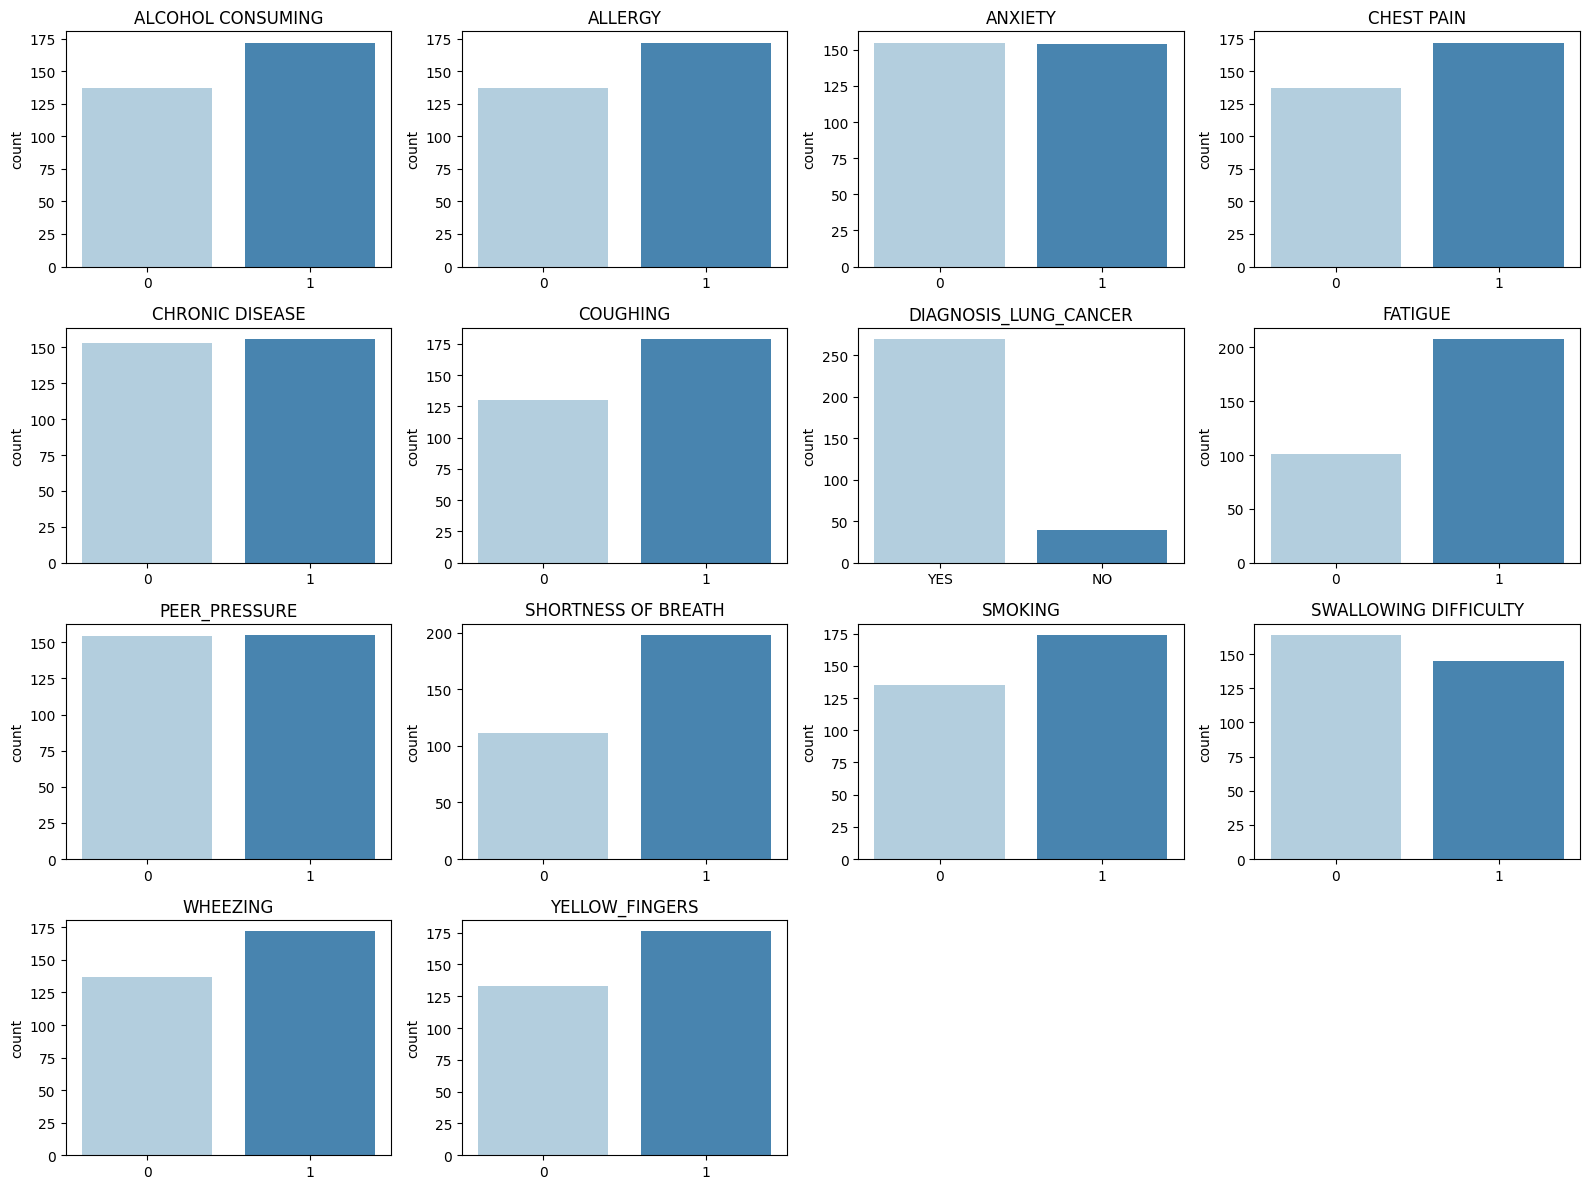

In [11]:
# Cek imbalance/balance data yang ada pada dataset
import matplotlib.pyplot as plt
import seaborn as sns

binary_cols = df.columns.difference(['AGE', 'GENDER'])

n_cols = 4
n_rows = (len(binary_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()


for i, col in enumerate(binary_cols):
    sns.countplot(data=df, x=col, hue=col, ax=axes[i], palette='Blues', legend=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('count')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Terlihat jelas bahwa target dari Diagnosis Lung Cancer memiliki data imbalance yang sangat jauh. Maka dari itu dibutuhkan SMOTE untuk menghindari terjadinya overfitting. Untuk feature-feature lain, bisa dibilang masih relatif aman dan tidak terlalu jauh perbedaannya

/tmp/ipykernel_6435/2262685366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['AGE'], palette='Blues')


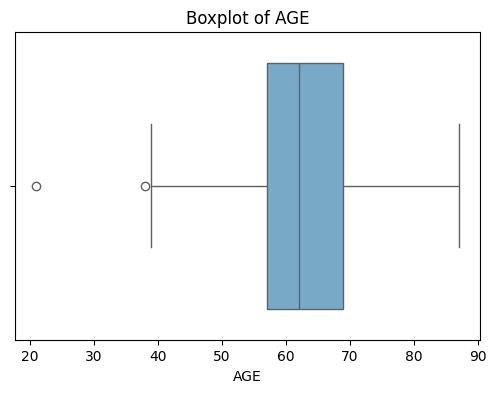

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['AGE'], palette='Blues')
plt.title("Boxplot of AGE")
plt.show()

Rata rata AGE dominan di kanan pada sekitar umur 55 - 70 dari box plot tersebut

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'SMOKING'}>,
        <Axes: title={'center': 'YELLOW_FINGERS'}>,
        <Axes: title={'center': 'ANXIETY'}>],
       [<Axes: title={'center': 'PEER_PRESSURE'}>,
        <Axes: title={'center': 'CHRONIC DISEASE'}>,
        <Axes: title={'center': 'FATIGUE'}>,
        <Axes: title={'center': 'ALLERGY'}>],
       [<Axes: title={'center': 'WHEEZING'}>,
        <Axes: title={'center': 'ALCOHOL CONSUMING'}>,
        <Axes: title={'center': 'COUGHING'}>,
        <Axes: title={'center': 'SHORTNESS OF BREATH'}>],
       [<Axes: title={'center': 'SWALLOWING DIFFICULTY'}>,
        <Axes: title={'center': 'CHEST PAIN'}>, <Axes: >, <Axes: >]],
      dtype=object)

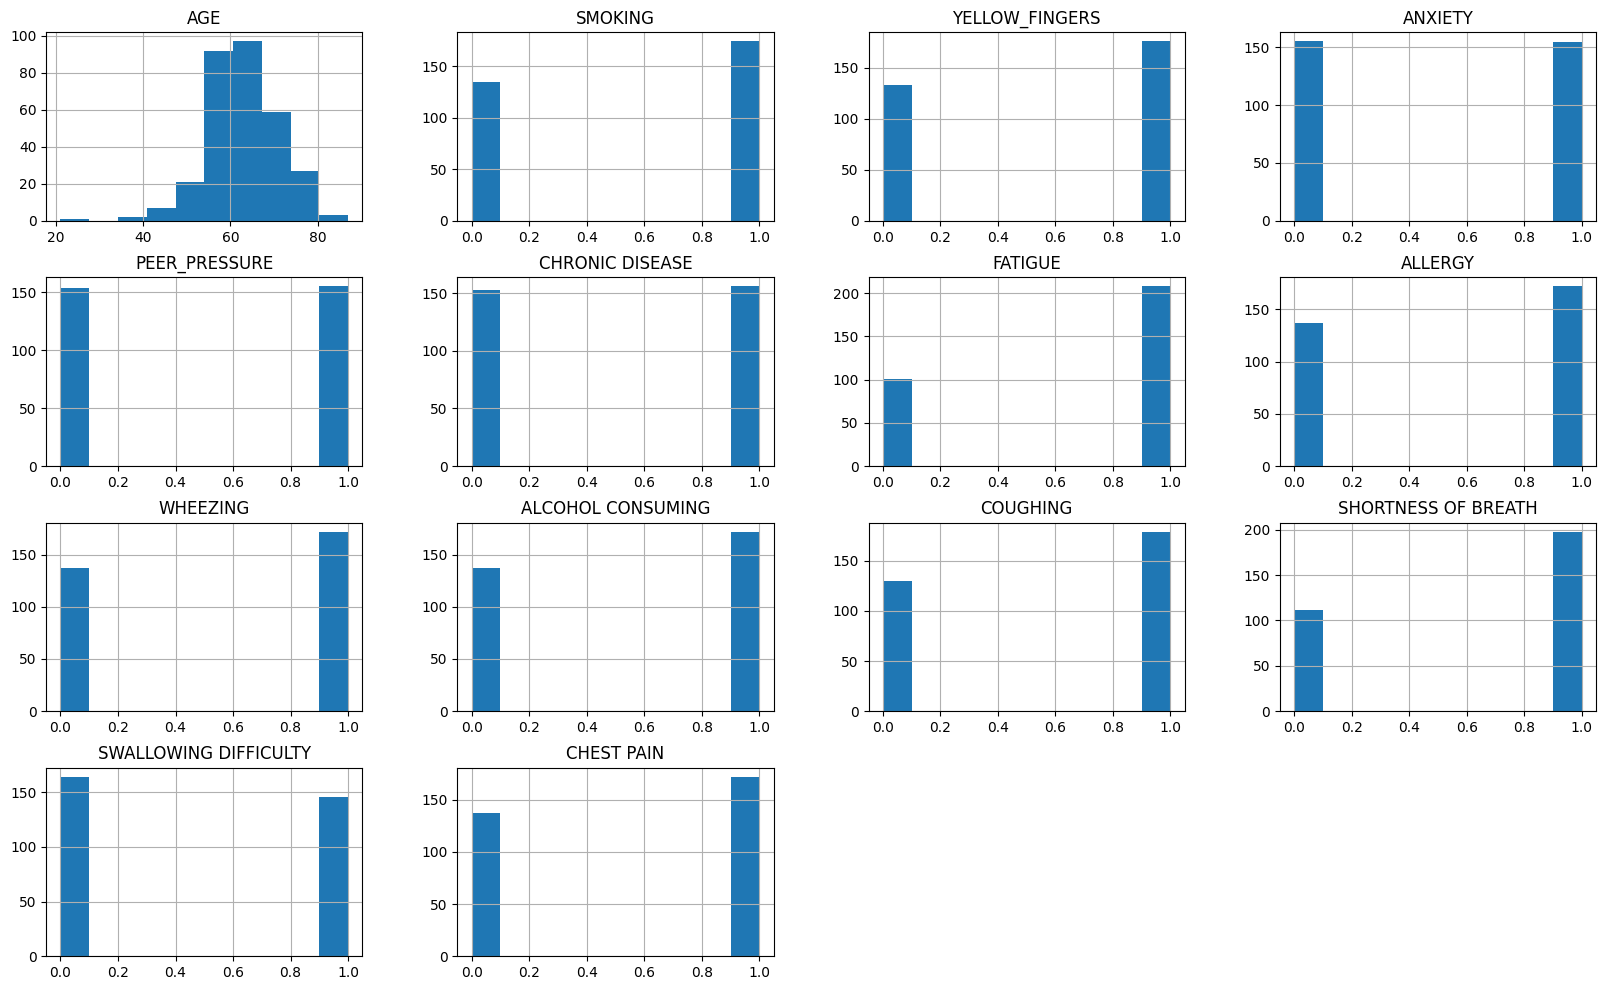

In [13]:
# Plot numerical columns
num_columns = [column for column in df.columns if type(df[column]) != 'object']
df.hist(column = num_columns, figsize = [20, 12])

Dari plotting diatas, bisa dilihat bahwa pada Age data terdistribusi secara Left Skewed dimana data condong ke kanan dan ekornya berada di kiri. Hal ini bisa menunjukkan bahwa pasien yang terdiagnosis kanker paru paru biasanya berada di rentan umur yang lebih tua dibandingkan umur yang lebih muda. Untuk faktor faktor lainnya, ada beberapa yang mempengaruhi seperti SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN. Terlihat pada visualisasi diatas bahwa beberapa mempengaruhi adanya kanker paru paru terutama pada 'SMOKING', 'YELLOW_FINGERS', 'FATIGUE', 'COUGHING', 'SHORTNESS OF BREATH', dan lain-lain.

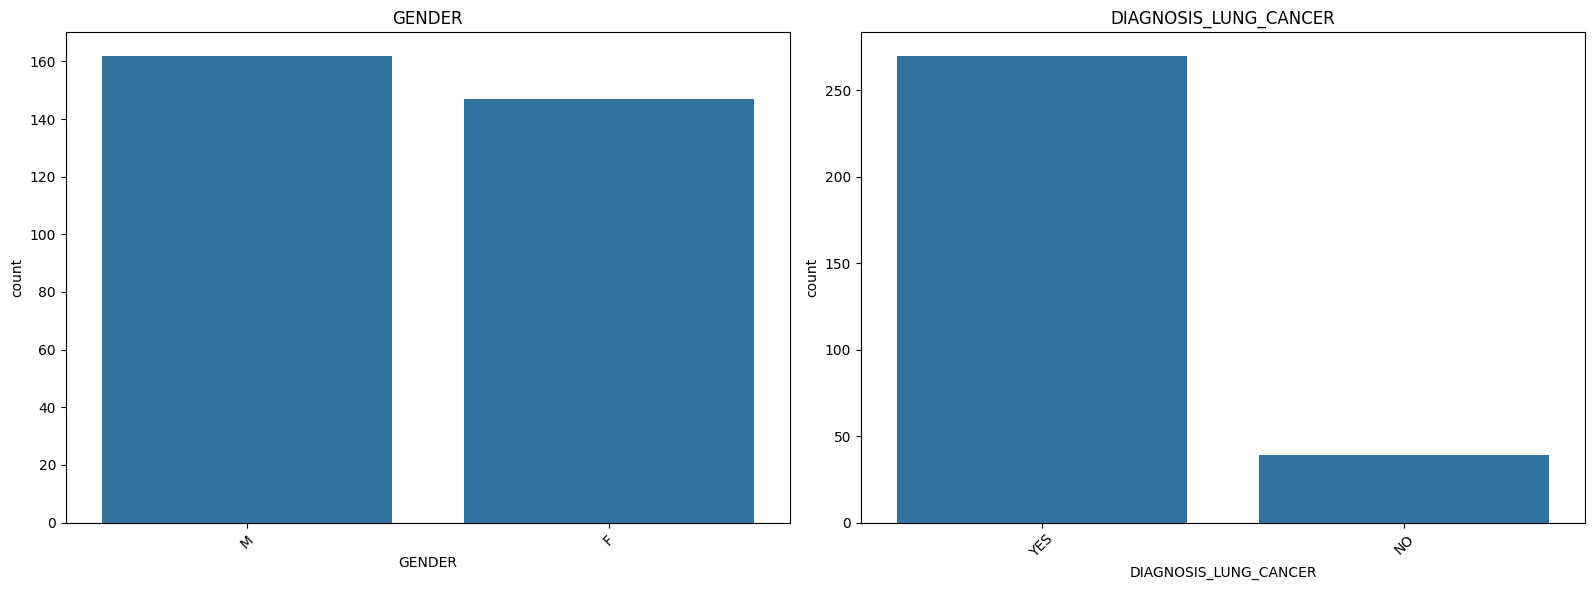

In [14]:
# Plot categorical columns
categoric_columns = [column for column in df.columns if df[column].dtype == 'object']
import math

n_cols = 3
n_rows = math.ceil(len(categoric_columns) / n_cols)

plt.figure(figsize=(8 * n_cols, 6 * n_rows))

for i, column in enumerate(categoric_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=column)
    plt.title(f'{column}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Dari Visualisasi plot categorical column diatas menunjukkan bahwa data lebih banyak laki laki dibandingkan perempuan. Dan untuk perbandingan terkena kanker atau tidaknya lebih banyak yang terkena kanker dibandingkan dengan yang tidak/ sehat.

Encoding Categorical Columns

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode setiap categorical column menggunakan label encoder
label_encoders = {}

# Encode dan simpan encoder-nya
for col in categoric_columns:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le  # simpan encoder-nya

for col, le in label_encoders.items():
    print(f"\nMapping for column '{col}':")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} -> {i}")


Mapping for column 'GENDER':
  F -> 0
  M -> 1

Mapping for column 'DIAGNOSIS_LUNG_CANCER':
  NO -> 0
  YES -> 1


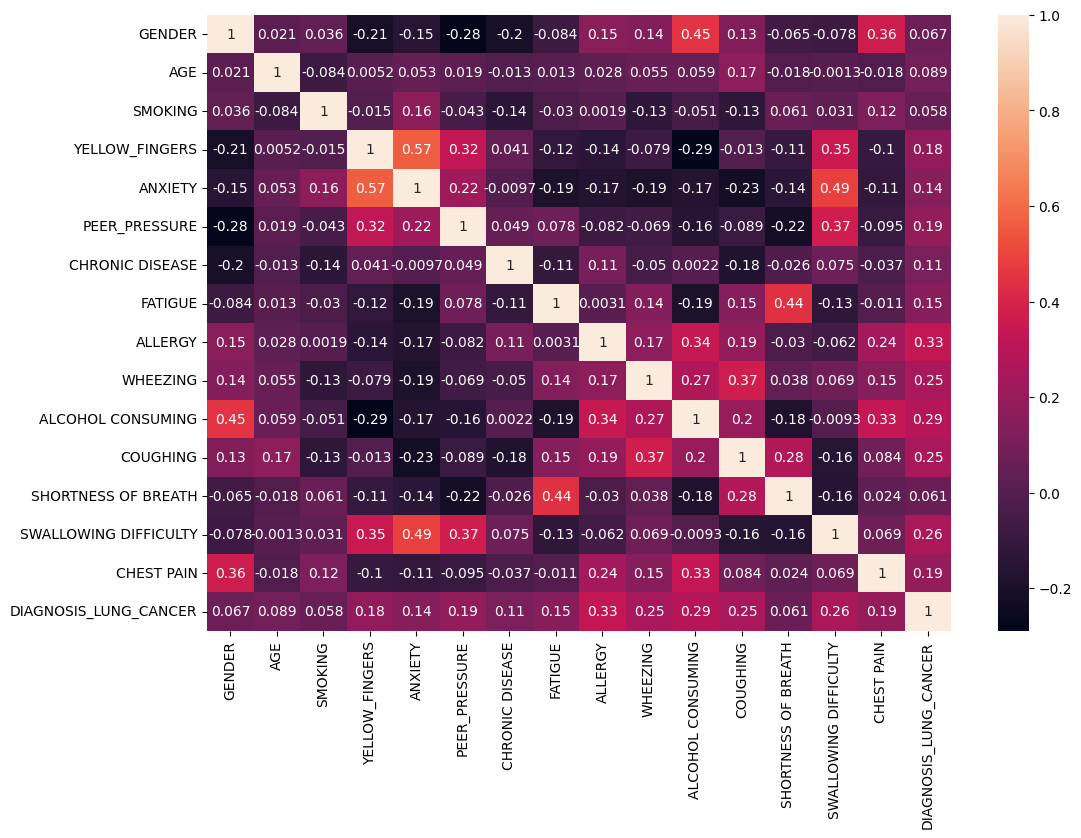

In [16]:
corr_matrix = df.corr()
plt.figure(figsize=[12,8])
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [17]:
corr_matrix['DIAGNOSIS_LUNG_CANCER']

GENDER                   0.067254
AGE                      0.089465
SMOKING                  0.058179
YELLOW_FINGERS           0.181339
ANXIETY                  0.144947
PEER_PRESSURE            0.186388
CHRONIC DISEASE          0.110891
FATIGUE                  0.150673
ALLERGY                  0.327766
WHEEZING                 0.249300
ALCOHOL CONSUMING        0.288533
COUGHING                 0.248570
SHORTNESS OF BREATH      0.060738
SWALLOWING DIFFICULTY    0.259730
CHEST PAIN               0.190451
DIAGNOSIS_LUNG_CANCER    1.000000
Name: DIAGNOSIS_LUNG_CANCER, dtype: float64

Berdasarkan analisis map correlation, terdapat beberapa fitur yang menunjukkan hubungan yang cukup kuat terhadap variabel target DIAGNOSIS_LUNG_CANCER. Fitur dengan korelasi tertinggi adalah ALCOHOL CONSUMING dengan nilai korelasi sebesar 0.33, diikuti oleh CHEST PAIN dengan korelasi 0.31. Selanjutnya, FATIGUE dan SWALLOWING DIFFICULTY memiliki korelasi masing-masing sebesar 0.26, sedangkan COUGHING dan WHEEZING masing-masing menunjukkan korelasi sebesar 0.25 terhadap diagnosis kanker paru-paru. Nilai-nilai korelasi ini menunjukkan bahwa terdapat hubungan positif antara kemunculan gejala atau kondisi tersebut dengan kemungkinan seseorang didiagnosis menderita kanker paru-paru. Dengan demikian, fitur-fitur tersebut dapat dianggap sebagai faktor penting dan relevan dalam membangun model prediksi untuk mendeteksi kanker paru-paru secara dini.

Modeling & Training

In [18]:
X = df.drop(['DIAGNOSIS_LUNG_CANCER'], axis = 1)
y = df['DIAGNOSIS_LUNG_CANCER']

In [19]:
from sklearn.model_selection import train_test_split

# Dataset dibagi menjadi train, validation, dan test:
# Train set digunakan untuk melatih model.
# Validation set digunakan untuk menyetel atau menyesuaikan parameter model (tuning).
# Test set hanya digunakan sekali di akhir, untuk mengevaluasi performa akhir model terhadap data yang benar-benar belum pernah dilihat sebelumnya (unseen data).
# Gunakan Stratify untuk menghindari terjadinya data yang bias
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

In [20]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

def cross_validate(model, X, y):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    # Melakukan smoting dan scaling pada setiap model
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    scores = cross_val_score(pipeline, X, y, scoring='f1_macro', cv=kfold, n_jobs=-1)
    return scores

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# mencoba beberapa klasifikasi model untuk mencari model yang terbaik
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))
models.append(('MLP', MLPClassifier(max_iter=1000)))
models.append(('NB', GaussianNB()))
models.append(('LGBM', LGBMClassifier()))

results = []
names = []

# print setiap model untuk mencari model yang terbaik
for name, model in models:
    scores = cross_validate(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print(f'{name}: {scores.mean()} +- ({scores.std()})')

LR: 0.7514650178603097 +- (0.07377098379472546)
KNN: 0.7672938097290665 +- (0.0639263271898173)
SVC: 0.742281898266553 +- (0.09175015868306588)
DT: 0.7686007102467056 +- (0.12816155124771003)
RF: 0.7760325152314432 +- (0.07851834003159625)


/workspaces/DATATHON_LUNG_CANCER/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:03:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/DATATHON_LUNG_CANCER/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:03:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/DATATHON_LUNG_CANCER/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:03:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/workspaces/DATATHON_LUNG_CANCER/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:03:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

XGB: 0.7860213669594254 +- (0.08529173000531132)
MLP: 0.7052007469654529 +- (0.09022707874295338)
NB: 0.7534099913433163 +- (0.10625690606068657)
[LightGBM] [Info] Number of positive: 137, number of negative: 137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 274, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 137, number of negative: 137
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the over

Dari sini dapat dilihat bahwa XGBoost memiliki skor tertinggi

XGBoost Evaluation Model

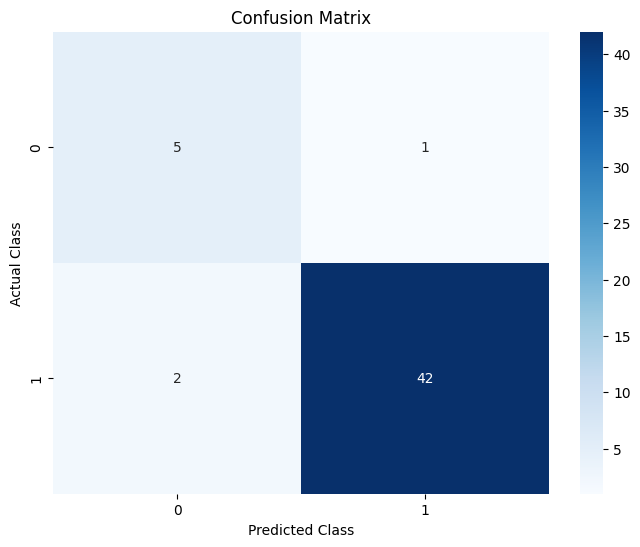

In [23]:
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from itertools import cycle

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = XGBClassifier()
model.fit(X_resampled, y_resampled)

y_true = y_val
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)

class_labels = ['0','1']
n_classes = len(class_labels)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Kategori	Penjelasan	Nilai
True Negative (TN)	Model memprediksi tidak terkena kanker (0), dan benar	5
False Positive (FP)	Model memprediksi terkena kanker (1), padahal seharusnya tidak	1
False Negative (FN)	Model memprediksi tidak terkena kanker (0), padahal seharusnya terkena	2
True Positive (TP)	Model memprediksi terkena kanker (1), dan benar	42



Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.98      0.95      0.97        44

    accuracy                           0.94        50
   macro avg       0.85      0.89      0.87        50
weighted avg       0.95      0.94      0.94        50

--Evaluation Metrics--
Accuracy : 0.94
Precision: 0.9767441860465116
Recall   : 0.9545454545454546
F1 Score : 0.9655172413793104
--ROC AUC Score--
ROC AUC Score: 0.9734848484848485


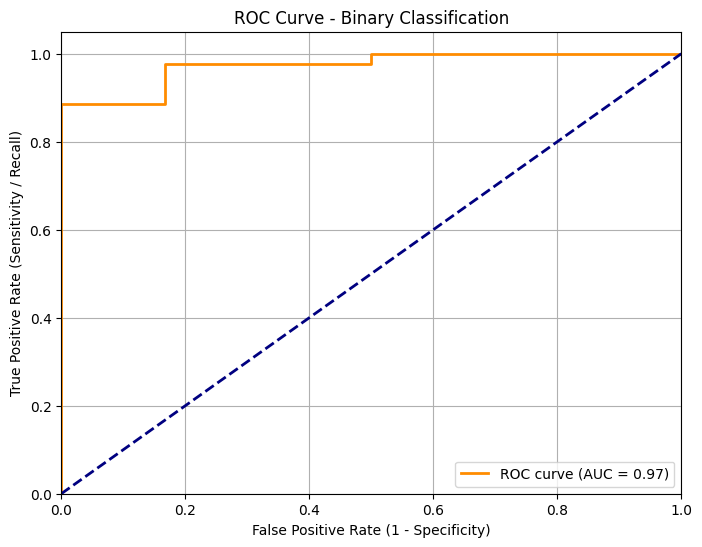

In [24]:
# Evaluation Metrics
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))
print('--Evaluation Metrics--')
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

# ROC AUC Score and Curve
print('--ROC AUC Score--')
roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
print("ROC AUC Score:", roc_auc)

# Hitung FPR, TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # garis random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Hyper Parameter Tuning

In [25]:
X = df.drop(['DIAGNOSIS_LUNG_CANCER'], axis = 1)
y = df['DIAGNOSIS_LUNG_CANCER']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

In [26]:
from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', model)
])

# hyperparameter tuning
param_dist = {
    'model__n_estimators': [100, 200, 300, 400, 500],
    'model__max_depth': [3, 5, 7, 10],
    'model__eta': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.2, 0.5, 1.0],
    'model__reg_lambda': [0, 0.1, 1, 10],
    'model__reg_alpha': [0, 0.1, 1, 10]
}

# melakukan cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search_XGB = RandomizedSearchCV(
    pipeline, param_dist, n_iter=10, cv=kfold, verbose = 1, scoring='f1_macro', n_jobs=-1, random_state=42
)
random_search_XGB.fit(X_train, y_train)

print("Best Parameters:", random_search_XGB.best_params_)
print("Best Cross-Validation f1 macro:", random_search_XGB.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best Parameters: {'model__subsample': 0.8, 'model__reg_lambda': 10, 'model__reg_alpha': 0.1, 'model__n_estimators': 400, 'model__max_depth': 3, 'model__gamma': 0.2, 'model__eta': 0.2, 'model__colsample_bytree': 1.0}
Best Cross-Validation f1 macro: 0.8356389986824769


Setelah dilihat-lihat melakukan hyper parameter tuning mendapat nilai f1 macro yang lebih rendah dibandingkan dengan yang original model.

Final Model

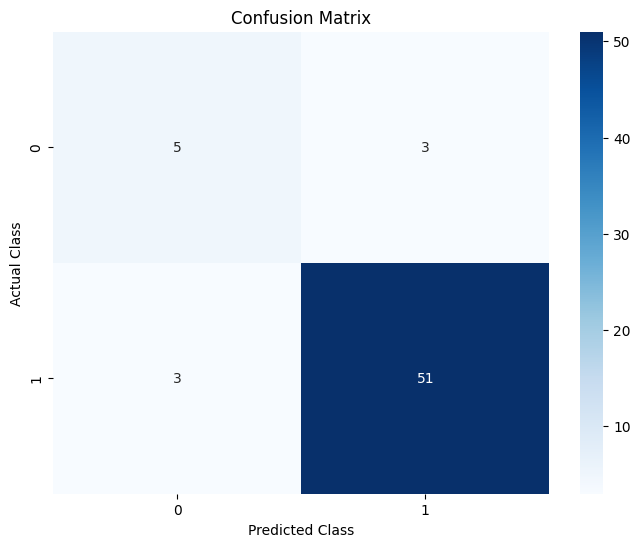

In [27]:
# Terapkan SMOTE ke data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Latih model pada data yang sudah di-smote
model = XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Evaluasi pada test set
y_true = y_test
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


class_labels = ['0','1']
n_classes = len(class_labels)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62

--Evaluation Metrics--
Accuracy : 0.9032258064516129
Precision: 0.9444444444444444
Recall   : 0.9444444444444444
F1 Score : 0.9444444444444444
--ROC AUC Score--
ROC AUC Score: 0.9282407407407407


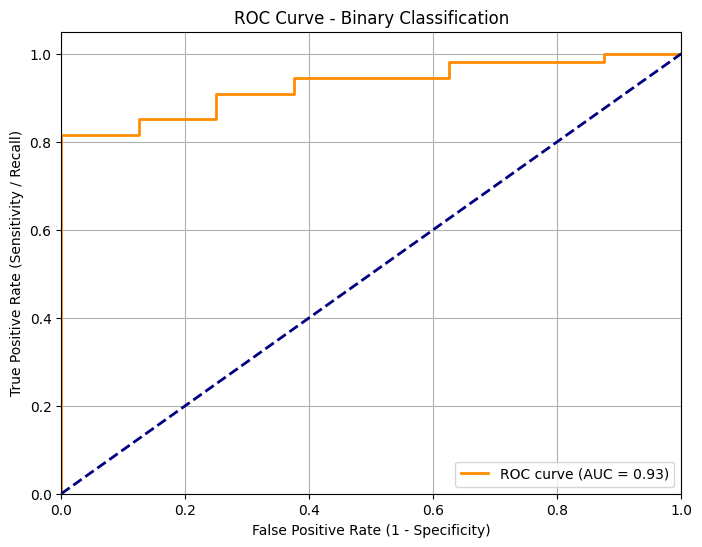

In [28]:
# Evaluation Metrics
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))
print('--Evaluation Metrics--')
print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall   :", recall_score(y_true, y_pred))
print("F1 Score :", f1_score(y_true, y_pred))

# ROC AUC Score and Curve
print('--ROC AUC Score--')
roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
print("ROC AUC Score:", roc_auc)

# Hitung FPR, TPR
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # garis random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity / Recall)')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Berdasarkan confusion matrix dan hasil evaluasi, XGBoost dengan SMOTE menghasilkan performa yang sangat baik secara keseluruhan, dengan akurasi sebesar 90%, precision dan recall untuk kelas 1 (mayoritas) sebesar 94%, serta macro average F1-score sebesar 0.78, yang menunjukkan model juga cukup mampu mengenali kelas minoritas (kelas 0). Penerapan SMOTE terbukti membantu menjaga keseimbangan prediksi antar kelas. Nilai ROC AUC sebesar 0.93 juga menunjukkan kemampuan model yang sangat baik dalam membedakan kedua kelas.

Import Model

In [29]:
import pickle 
with open('./model.pkl', 'wb') as f:
    pickle.dump(model, f)